In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import time
import sys

from ML_matcher_helpers import *

# MLPRegressor $ \rightarrow $ solver = adam
Multi-layer Perceptron regressor
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [2]:
# Load trainning data
NPions = "10"
trainning_data, trainning_data_MatchTruth, trainning_data_NPairsMCHTracks = load_data(NPions, nMCHTracks="50000")

# Scale trainning data
scaler = StandardScaler()
scaler.fit(trainning_data)
trainning_data = scaler.transform(trainning_data)

Data not loaded! Continuing...
Loading data_50000MCHTraks_20Mu_10PiPerEvent
Loaded data in  0.11064265780005371  minutes ( 6.638559468003223  seconds)
N MCH Tracks = 50000
N pairs = 1368617


In [3]:
# MLPRegressor trainning
hiddenLayersConfig=(35,33,30,28,25,23,20,18,15,12,10,8,5)
mlpr = MLPRegressor_initAndTrain(hiddenLayersConfig,
                                solver = 'adam',
                                max_iter = 50000,
                                activation = 'relu',
                                trainning_data = trainning_data,
                                trainning_data_MatchTruth = trainning_data_MatchTruth)

mlpr trainning time =  3.086685306300448  minutes
Trainning Accuracy:  0.9585711759206621


In [4]:
# Load test data
NPions = "10"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_10PiPerEvent
Loaded data in  0.0012733510336450612  minutes ( 0.07640106201870367  seconds)
N MCH Tracks = 1000
N pairs = 27873


In [5]:
# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

Prediction accuracy:
 0.9662962671318298


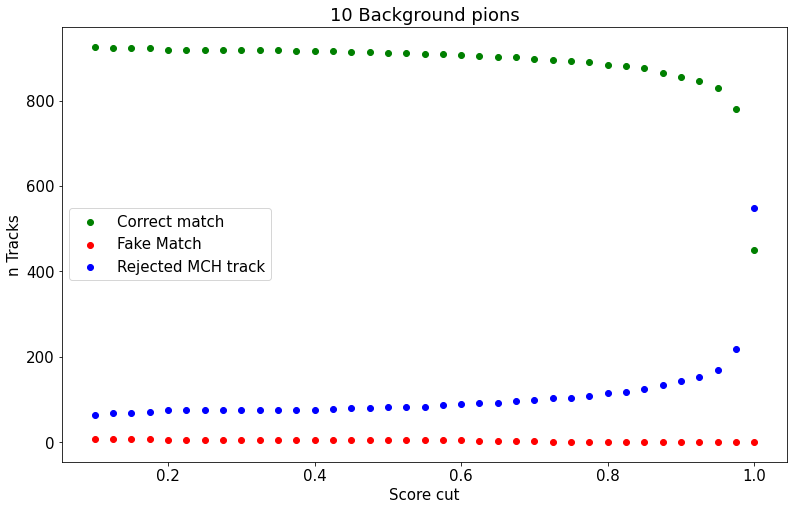

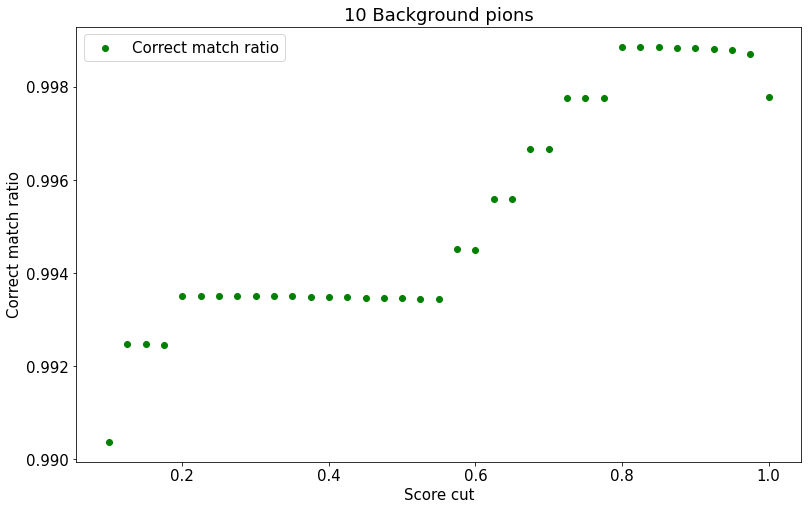

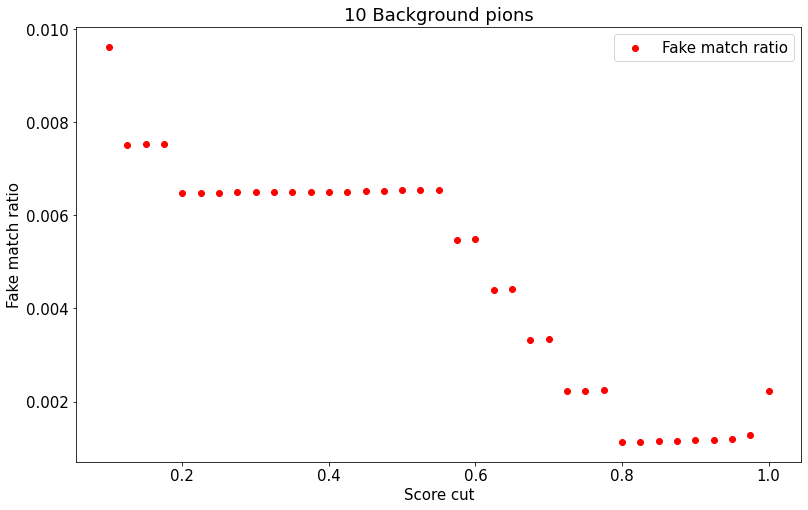

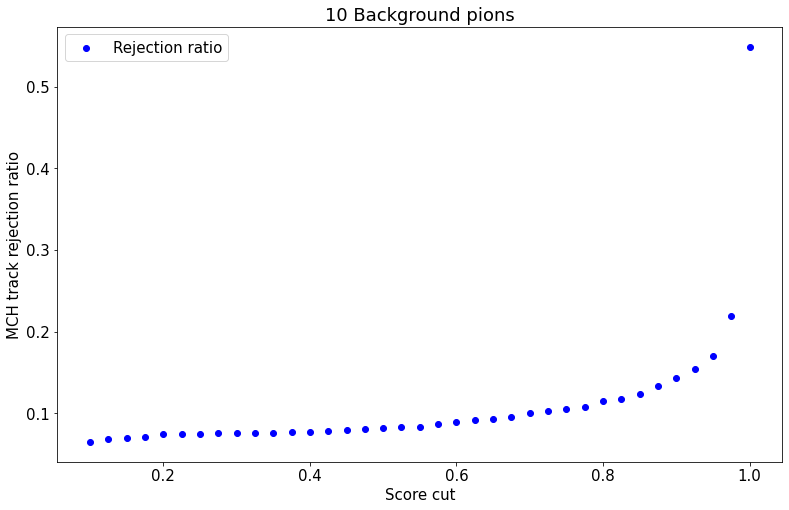

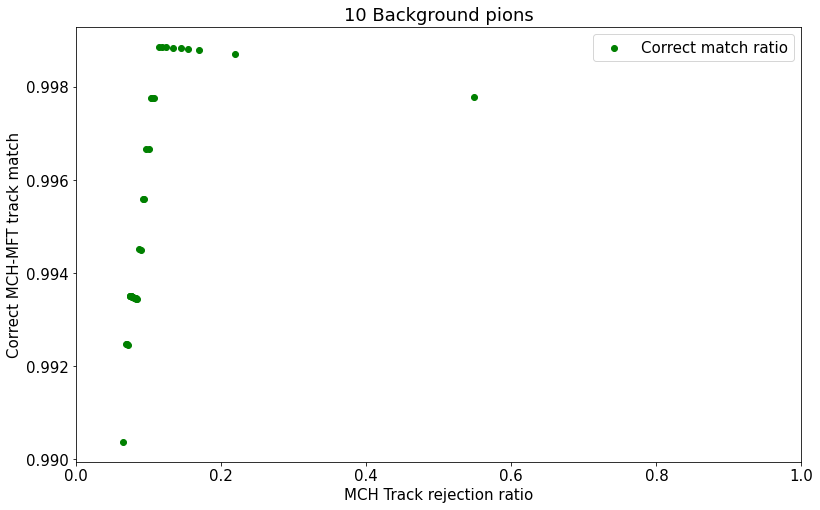

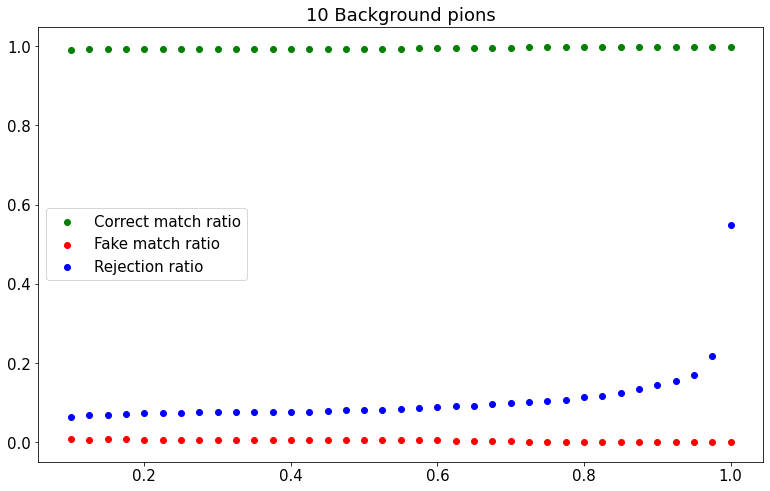

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [926. 924. 923. 922. 919. 919. 919. 918. 918. 918. 918. 917. 917. 916.
 914. 913. 912. 911. 910. 908. 906. 904. 903. 901. 897. 895. 893. 890.
 884. 881. 875. 865. 855. 845. 829. 780. 450.]
fake matches:  [9. 7. 7. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 4. 4. 3.
 3. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
no matches:  [ 65.  69.  70.  71.  75.  75.  75.  76.  76.  76.  76.  77.  77.  78.
  80.  81.  82.  83.  84.  87.  89.  92.  93.  96. 100. 103. 105. 108.
 115. 118. 124. 134. 144. 154. 170. 219. 549.]


In [6]:
# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")

In [7]:
test_data_matches = np.where(test_data_MatchTruth == 1)
first_test_data_match=test_data_matches[0][0]
print("Index of first_test_data_match: ",first_test_data_match)
Match_pred_single = mlpr.predict(test_data[first_test_data_match].reshape(1, -1))
print("Score:",Match_pred_single)

Index of first_test_data_match:  10
Score: [1.00415857]


In [8]:
print("Indexes of correct matches (input MC):")
print(test_data_matches)

Indexes of correct matches (input MC):
(array([   10,    33,    63,    88,   118,   189,   204,   244,   252,
         291,   319,   355,   378,   390,   418,   433,   460,   492,
         511,   551,   598,   624,   642,   683,   688,   717,   774,
         809,   827,   871,   876,   945,   960,   991,  1019,  1062,
        1081,  1108,  1140,  1172,  1212,  1237,  1271,  1292,  1307,
        1335,  1364,  1396,  1421,  1448,  1453,  1489,  1500,  1523,
        1546,  1578,  1591,  1636,  1661,  1671,  1703,  1733,  1748,
        1784,  1804,  1857,  1876,  1903,  1944,  1965,  1974,  2001,
        2037,  2061,  2084,  2121,  2164,  2181,  2208,  2261,  2314,
        2345,  2361,  2402,  2422,  2476,  2491,  2520,  2576,  2583,
        2620,  2685,  2692,  2747,  2777,  2803,  2824,  2850,  2889,
        2918,  2933,  2962,  2991,  3029,  3049,  3076,  3117,  3179,
        3194,  3218,  3247,  3277,  3294,  3325,  3364,  3393,  3423,
        3448,  3465,  3530,  3544,  3563,  3586,  

In [9]:
print("Indexes of predicted matches for test data (score > 0.5):")
print(np.where(Match_pred > 0.5))

Indexes of predicted matches for test data (score > 0.5):
(array([   10,    33,    63,    88,   118,   189,   204,   244,   252,
         291,   319,   355,   378,   390,   418,   433,   460,   492,
         511,   551,   598,   624,   642,   683,   688,   717,   774,
         809,   827,   871,   876,   960,   991,  1019,  1062,  1081,
        1108,  1140,  1172,  1212,  1237,  1271,  1292,  1307,  1335,
        1364,  1396,  1421,  1448,  1453,  1489,  1500,  1523,  1546,
        1578,  1591,  1661,  1671,  1703,  1733,  1748,  1784,  1804,
        1857,  1876,  1903,  1944,  1965,  1974,  2001,  2037,  2061,
        2084,  2121,  2164,  2181,  2208,  2261,  2314,  2345,  2361,
        2402,  2422,  2476,  2491,  2520,  2576,  2583,  2620,  2685,
        2692,  2747,  2777,  2803,  2824,  2850,  2889,  2918,  2933,
        2962,  2991,  3029,  3049,  3076,  3117,  3179,  3194,  3218,
        3247,  3274,  3277,  3294,  3364,  3393,  3423,  3448,  3465,
        3530,  3544,  3563,  35

# Evaluate MLP Regressor prediction at higher multiplicities

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_400PiPerEvent
Loaded data in  0.025684224033223776  minutes ( 1.5410534419934265  seconds)
N MCH Tracks = 1000
N pairs = 382091
Prediction accuracy:
 0.8385456367734132


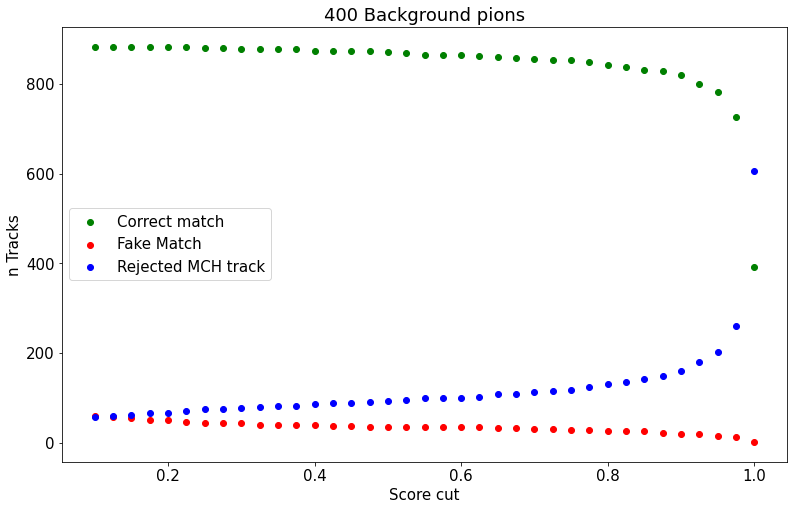

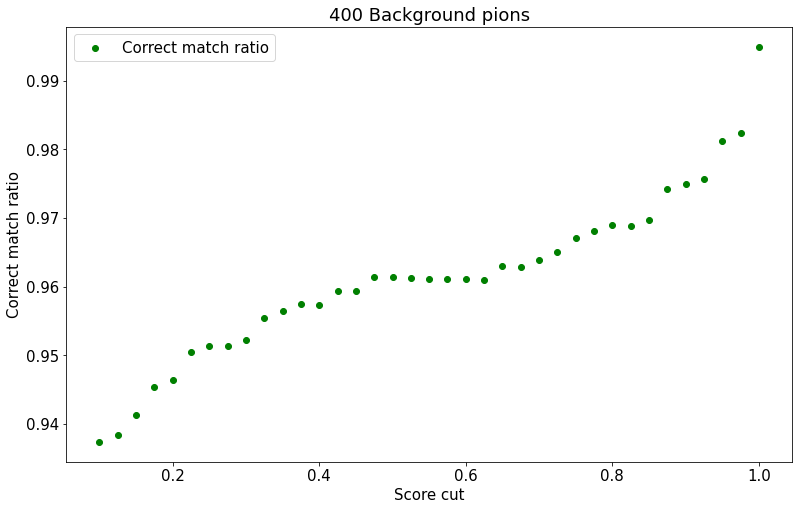

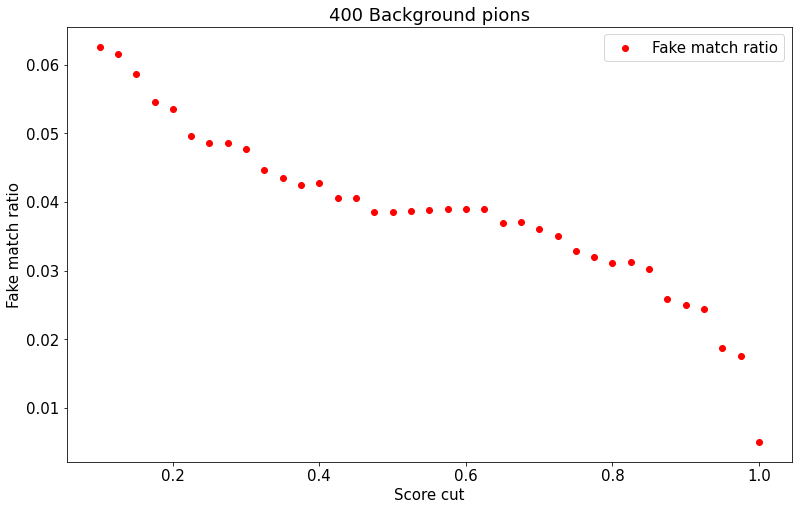

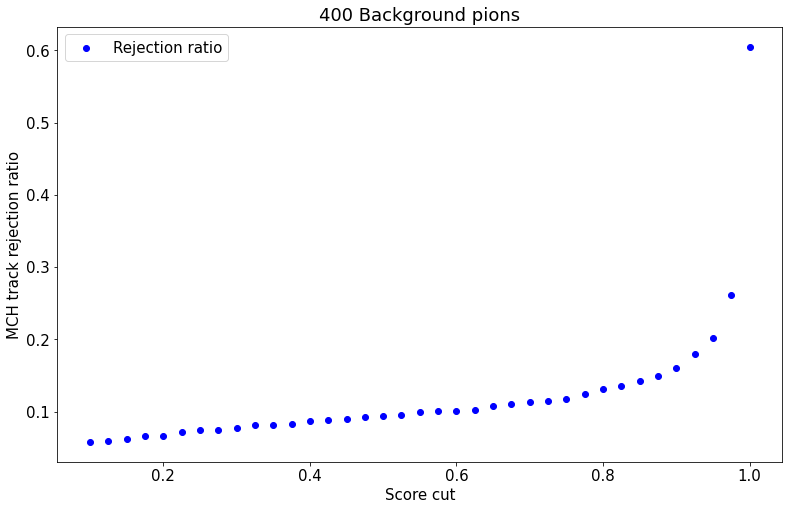

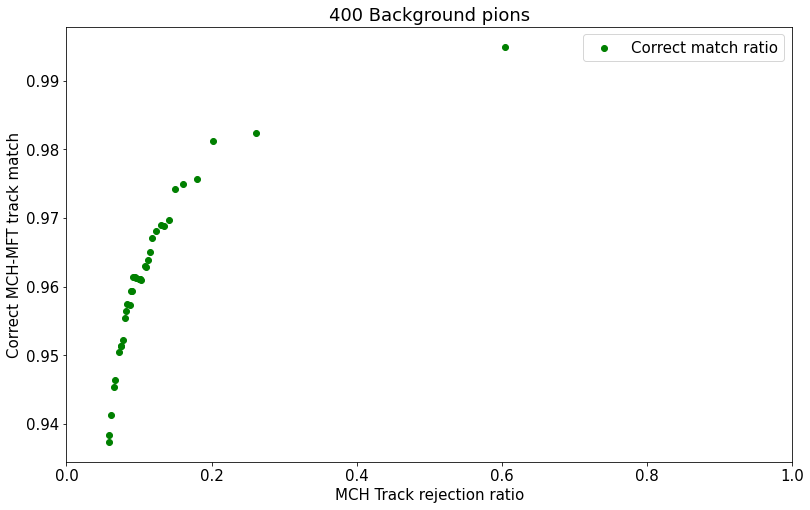

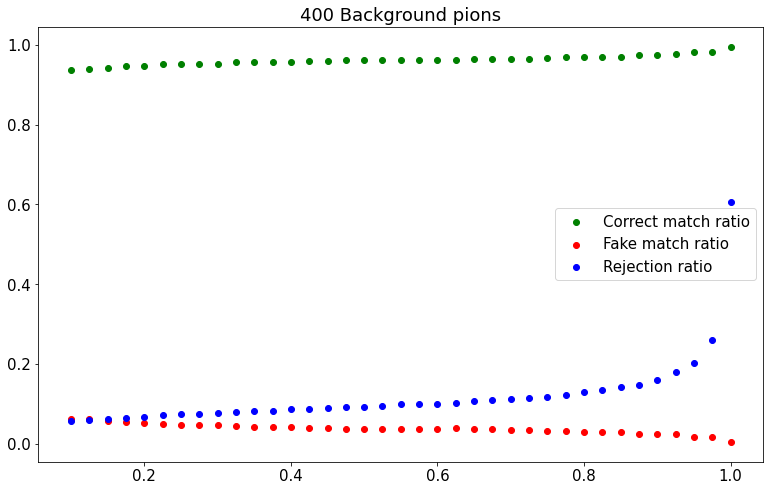

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [883. 883. 883. 883. 883. 882. 880. 880. 878. 878. 878. 878. 874. 874.
 873. 873. 871. 869. 865. 864. 864. 862. 859. 857. 855. 854. 853. 848.
 842. 838. 832. 829. 819. 800. 783. 726. 393.]
fake matches:  [59. 58. 55. 51. 50. 46. 45. 45. 44. 41. 40. 39. 39. 37. 37. 35. 35. 35.
 35. 35. 35. 35. 33. 33. 32. 31. 29. 28. 27. 27. 26. 22. 21. 20. 15. 13.
  2.]
no matches:  [ 58.  59.  62.  66.  67.  72.  75.  75.  78.  81.  82.  83.  87.  89.
  90.  92.  94.  96. 100. 101. 101. 103. 108. 110. 113. 115. 118. 124.
 131. 135. 142. 149. 160. 180. 202. 261. 605.]


In [10]:
# Load test data
NPions = "400"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")

Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_800PiPerEvent
Loaded data in  0.059224026499820566  minutes ( 3.5534415899892338  seconds)
N MCH Tracks = 1000
N pairs = 757144
Prediction accuracy:
 0.7008006795672422


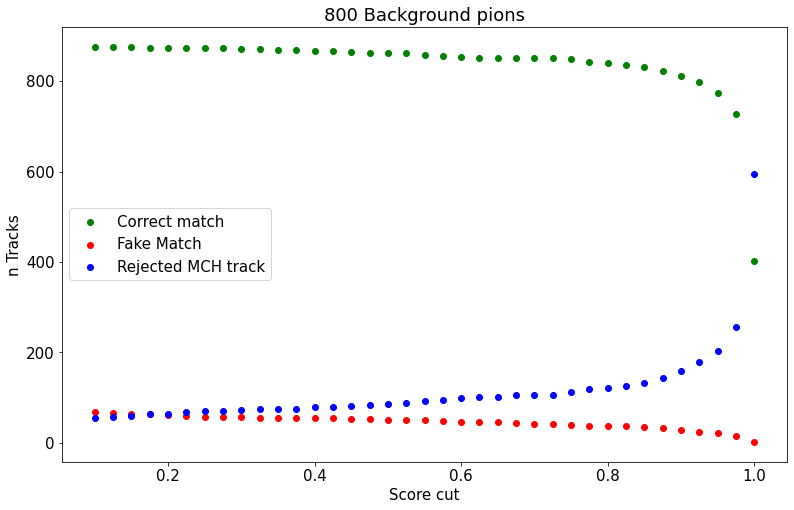

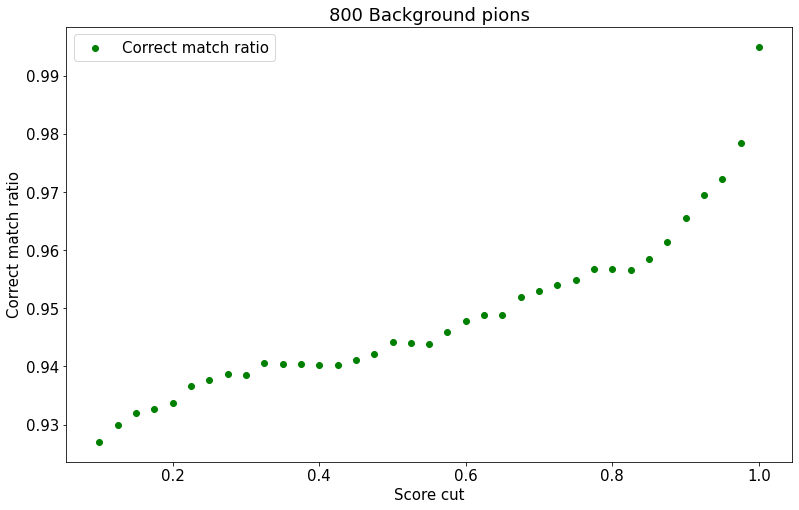

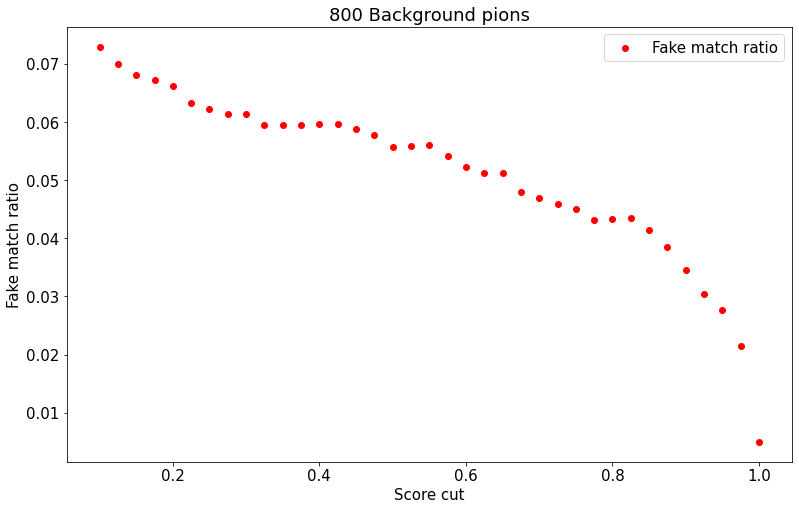

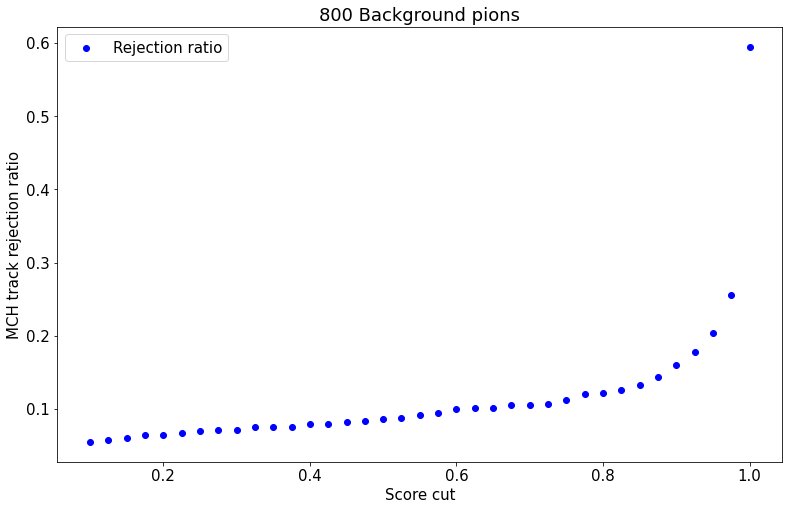

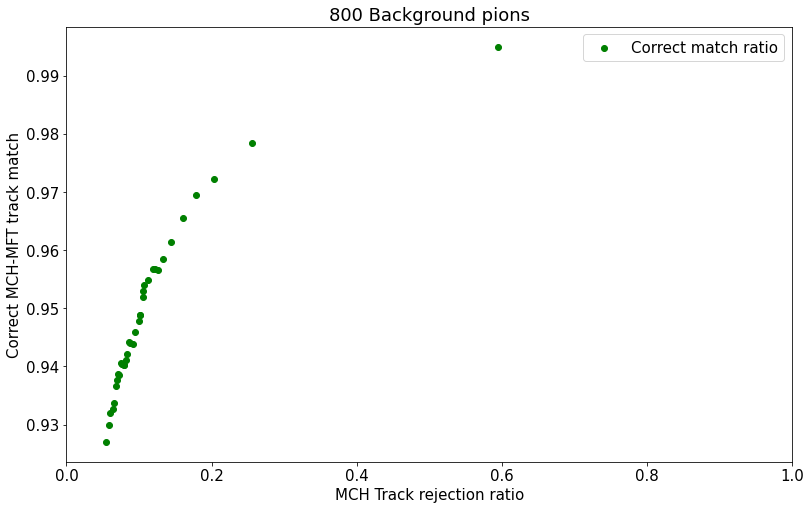

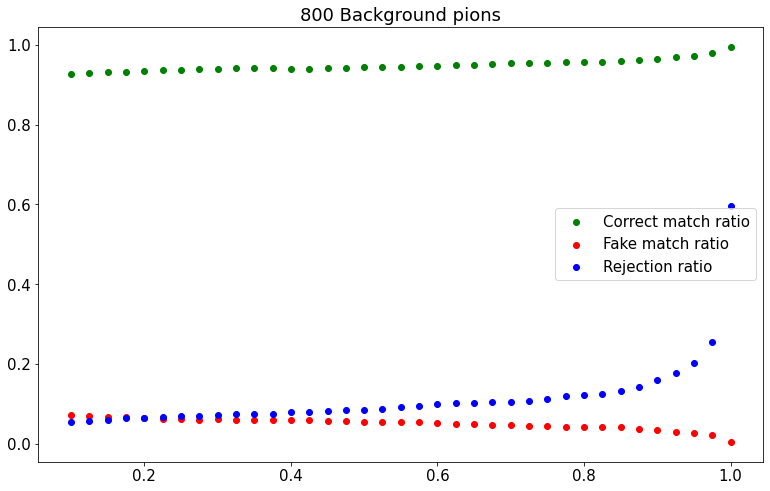

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [876. 876. 876. 873. 873. 873. 872. 872. 871. 870. 869. 869. 866. 866.
 864. 863. 863. 861. 857. 856. 853. 852. 852. 852. 852. 852. 848. 842.
 840. 836. 831. 823. 811. 797. 774. 728. 403.]
fake matches:  [69. 66. 64. 63. 62. 59. 58. 57. 57. 55. 55. 55. 55. 55. 54. 53. 51. 51.
 51. 49. 47. 46. 46. 43. 42. 41. 40. 38. 38. 38. 36. 33. 29. 25. 22. 16.
  2.]
no matches:  [ 55.  58.  60.  64.  65.  68.  70.  71.  72.  75.  76.  76.  79.  79.
  82.  84.  86.  88.  92.  95. 100. 102. 102. 105. 106. 107. 112. 120.
 122. 126. 133. 144. 160. 178. 204. 256. 595.]


In [11]:
# Load test data
NPions = "800"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")




Data not loaded! Continuing...
Loading data_1000MCHTraks_20Mu_1200PiPerEvent
Loaded data in  0.09332462196665195  minutes ( 5.599477317999117  seconds)
N MCH Tracks = 1000
N pairs = 1148900
Prediction accuracy:
 0.4018802436772554


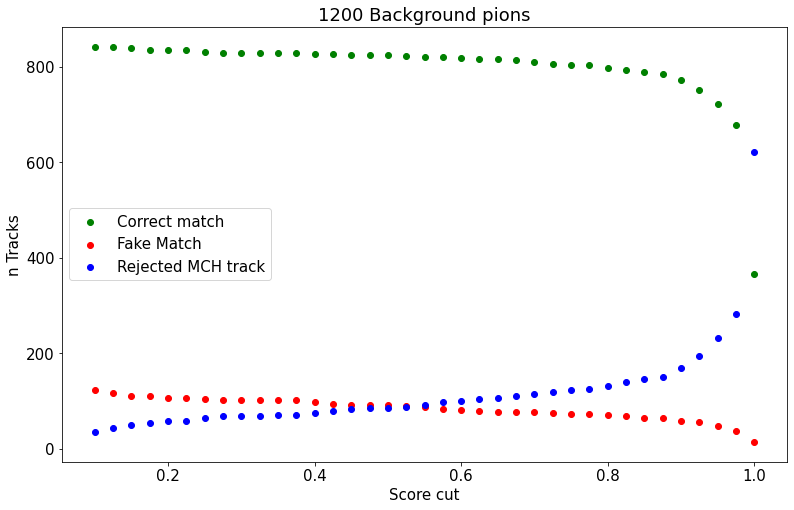

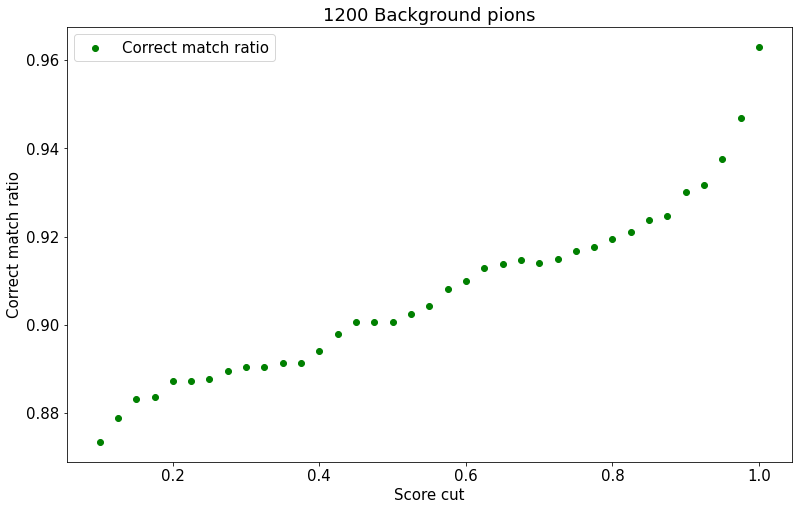

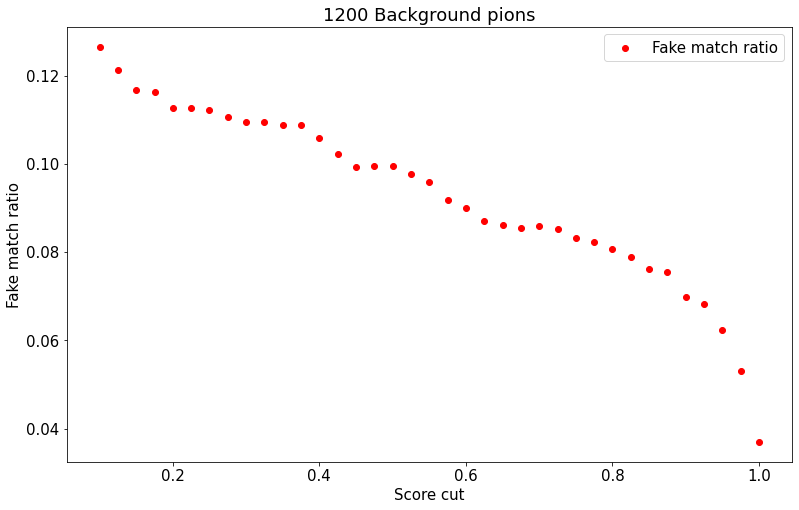

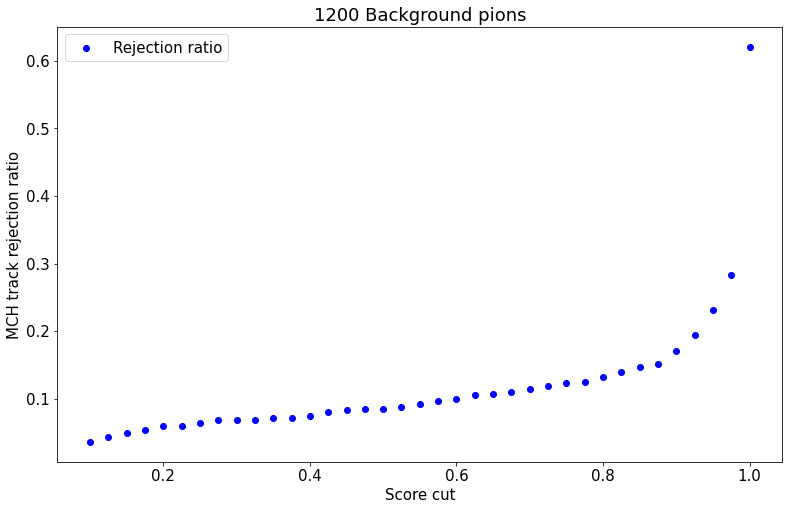

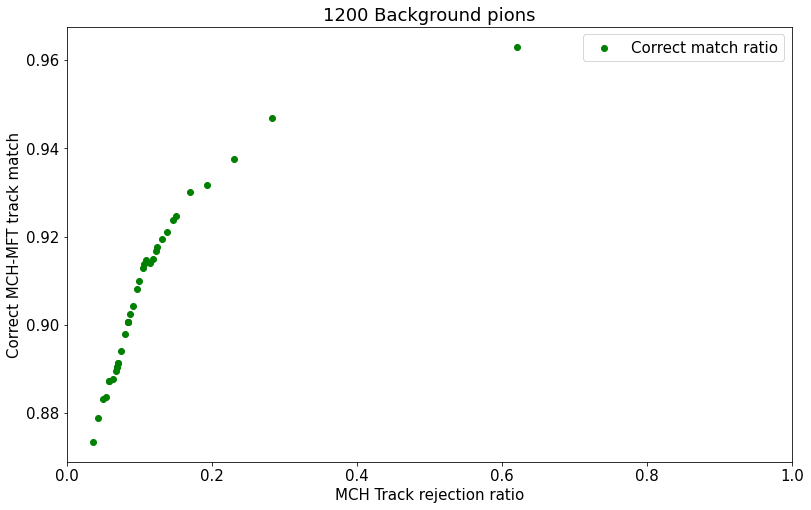

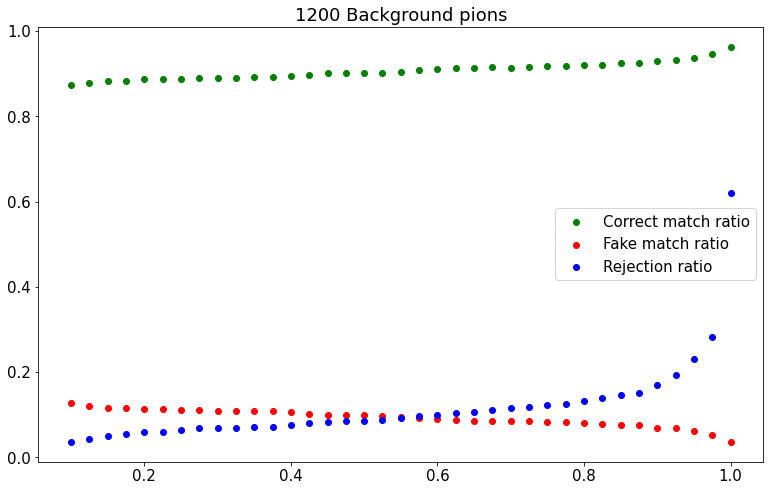

cuts:  [0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.   ]
correct matches :  [842. 841. 839. 836. 835. 835. 831. 829. 829. 829. 828. 828. 827. 826.
 825. 824. 824. 823. 821. 820. 819. 817. 816. 814. 809. 806. 804. 803.
 798. 793. 788. 785. 772. 751. 721. 679. 365.]
fake matches:  [122. 116. 111. 110. 106. 106. 105. 103. 102. 102. 101. 101.  98.  94.
  91.  91.  91.  89.  87.  83.  81.  78.  77.  76.  76.  75.  73.  72.
  70.  68.  65.  64.  58.  55.  48.  38.  14.]
no matches:  [ 36.  43.  50.  54.  59.  59.  64.  68.  69.  69.  71.  71.  75.  80.
  84.  85.  85.  88.  92.  97. 100. 105. 107. 110. 115. 119. 123. 125.
 132. 139. 147. 151. 170. 194. 231. 283. 621.]


In [12]:
# Load test data
NPions = "1200"
test_data, test_data_MatchTruth, test_data_NPairsMCHTracks = load_data(NPions)

# Scale test data 
test_data = scaler.transform(test_data)

# Apply trainning on input data
Match_pred = mlpr.predict(test_data)

acc2 = mlpr.score(test_data, test_data_MatchTruth)
print("Prediction accuracy:\n", acc2)

# Plot results
total_and_ratios_plots(Match_pred, test_data_MatchTruth, test_data_NPairsMCHTracks, NPions + " Background pions")